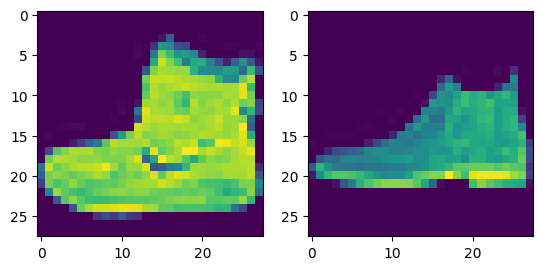

In [18]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

train_dataset = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_dataset = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(train_dataset.data[0])
fig.add_subplot(1,2,2)
plt.imshow(test_dataset.data[0])

In [29]:
torch.manual_seed(0)
model_0 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,128),
    nn.Sigmoid(),
    nn.Linear(128,10)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

epochs = 1000

train_dataloader = DataLoader(train_dataset,
    batch_size=32,
    shuffle=True
)

for epoch in range(epochs):
    model_0.train()

    [train_img, train_label] = next(iter(train_dataloader))
    X_parsed_train = train_img.squeeze()

    y_logits = model_0(X_parsed_train)
    y_parsed_train = F.one_hot(train_label,10).type(torch.float)

    loss = criterion(y_logits, y_parsed_train)

    if epoch % (epochs / 10) == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model_0.eval()

Epoch: 0 | Loss: 2.2460572719573975
Epoch: 100 | Loss: 0.976836621761322
Epoch: 200 | Loss: 0.8899368047714233
Epoch: 300 | Loss: 0.5848990082740784
Epoch: 400 | Loss: 0.7442419528961182
Epoch: 500 | Loss: 0.43125542998313904
Epoch: 600 | Loss: 0.6149239540100098
Epoch: 700 | Loss: 0.36920055747032166
Epoch: 800 | Loss: 0.3448770046234131
Epoch: 900 | Loss: 0.4147862195968628


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

Text(0.5, 1.0, 'Predicted: Trouser | Score: 99.40%')

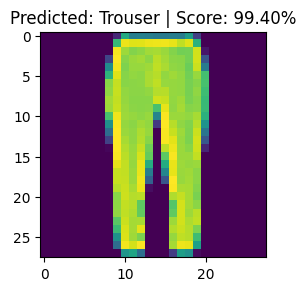

In [20]:
torch.manual_seed(0)
random_item_index = torch.randint(0, len(test_dataset), (1,)).item()
random_item = test_dataset[random_item_index]

img,_ = random_item
labelIndex = model_0(img)
highest_score_index = torch.argmax(labelIndex).item()
highest_score_percent = F.softmax(labelIndex, dim=1).squeeze()[highest_score_index].item() * 100
label = test_dataset.classes[highest_score_index]

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img.squeeze())
plt.title(f"Predicted: {label} | Score: {highest_score_percent:.2f}%")